In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data from the CSV files
table2 = pd.read_csv('mrc_table2.csv')
table10 = pd.read_csv('mrc_table10.csv')

# Find common columns between the two tables
columns_table2 = set(table2.columns)
columns_table10 = set(table10.columns)
common_columns = list(columns_table2.intersection(columns_table10))
common_columns

# Join by common columns
uni_data_all = pd.merge(table2, table10, on=common_columns, how='inner')

# Ensure we aren't losing too much data with inner merge
table2.shape[0], table10.shape[0], uni_data_all.shape[0]



(2202, 2463, 2199)

We want to determine how well each college/university is able to lift students out of poverty. 

To calculate this, we determine the probability of someone to reach the top three income quartiles (60th percentile or higher) if they were raised by parents in the bottom quartile (20th percentile or lower.)

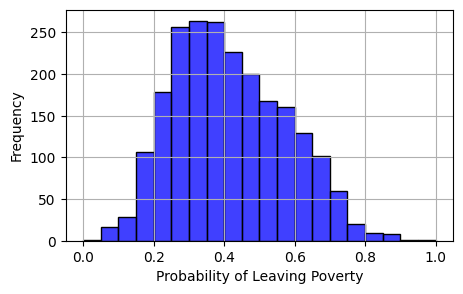

In [4]:
# create response variable for lifting from poverty
uni_data_all['prob_lift'] = uni_data_all['kq4_cond_parq1'] + uni_data_all['kq5_cond_parq1']

# check distribution
plt.figure(figsize=(5, 3))
bin_edges = np.arange(uni_data_all['prob_lift'].min(), uni_data_all['prob_lift'].max() + 0.05, 0.05)
sns.histplot(uni_data_all['prob_lift'], bins=bin_edges, kde=False, color="blue")
plt.xlabel('Probability of Leaving Poverty')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

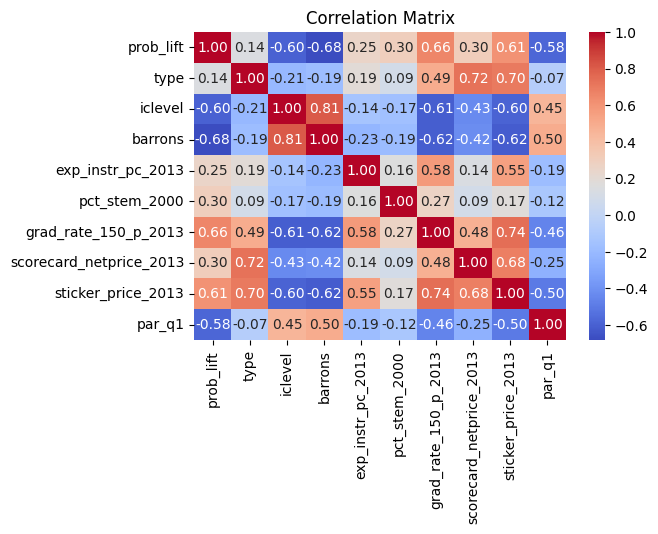

In [10]:
uni_data = uni_data_all[['prob_lift', 'state', 'tier_name', 'type', 'iclevel', 'barrons', 'exp_instr_pc_2013', 'pct_stem_2000',
                             'grad_rate_150_p_2013', 'scorecard_netprice_2013', 'sticker_price_2013', 'par_q1']]

# Correlation matrix
corr_matrix = uni_data.select_dtypes(include=[np.number]).corr()

# Visualization of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

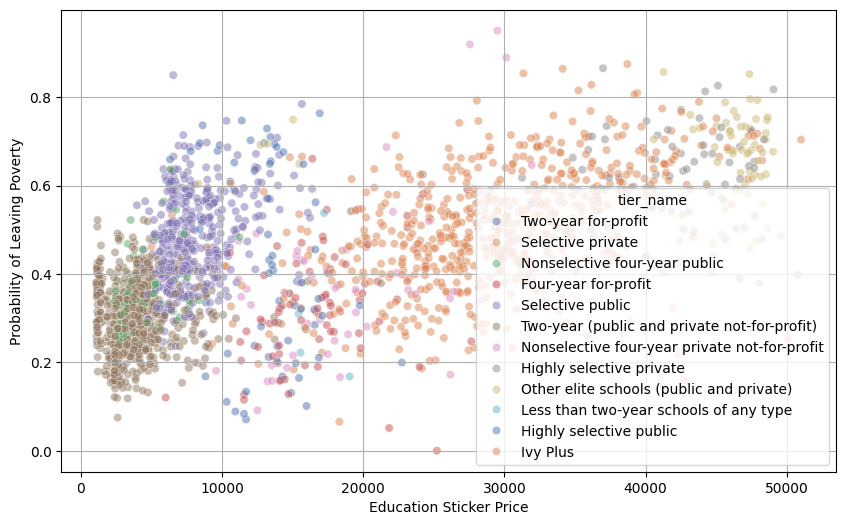

In [19]:
# Expensive schools benefit are more likely to lift individuals out of poverty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sticker_price_2013', 
                y='prob_lift', 
                hue = 'tier_name',
                alpha = 0.5,
                palette = 'deep',
                data=uni_data)
plt.xlabel('Education Sticker Price')
plt.ylabel('Probability of Leaving Poverty')
plt.grid(True)
plt.show()


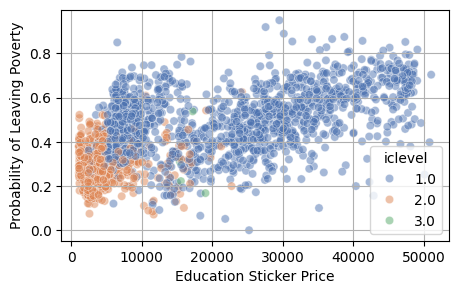

In [9]:
# Expensive schools benefit are more likely to lift individuals out of poverty
plt.figure(figsize=(5, 3))
sns.scatterplot(x='sticker_price_2013', 
                y='prob_lift', 
                hue = 'iclevel',
                alpha = 0.5,
                palette = 'deep',
                data=uni_data)
plt.xlabel('Education Sticker Price')
plt.ylabel('Probability of Leaving Poverty')
plt.grid(True)
plt.show()

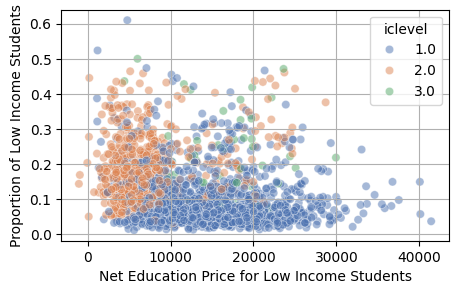

In [214]:
# Low income students are more likely to attend schools that cost less
plt.figure(figsize=(5, 3))
sns.scatterplot(x=uni_data['scorecard_netprice_2013'], 
                y=uni_data['par_q1'],
                hue = uni_data['iclevel'],
                alpha = 0.5,
                palette = 'deep')
plt.xlabel('Net Education Price for Low Income Students')
plt.ylabel('Proportion of Low Income Students')
plt.grid(True)
plt.show()